<a href="https://colab.research.google.com/github/Jeromy0515/machine-learning/blob/main/logistic_regression/V3_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False) # 30초 정도 소요

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
import numpy as np
print(mnist.feature_names)
print(np.unique(mnist.target))

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

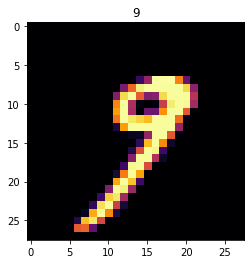

In [ ]:
import matplotlib.pyplot as plt
n = 33 # random
image = mnist.data[n].reshape(28, 28)
plt.imshow(image, cmap='inferno')
plt.title(mnist.target[n])
plt.show()

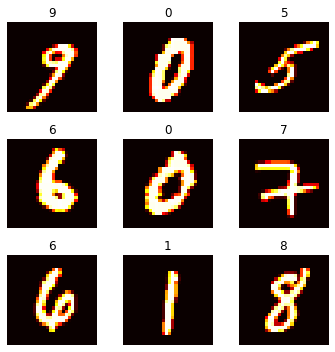

In [ ]:
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(mnist.data[n+i].reshape(28,28), 'hot')
  plt.title(mnist.target[n+i])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 0.3, stratify = mnist.target)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(49000, 784) (21000, 784) (49000,) (21000,)


In [ ]:
from sklearn.neural_network import MLPClassifier # MLP: Multi Layer Perceptron
model = MLPClassifier(hidden_layer_sizes=(784, 784), # 은닉층 200, 50 노드
                      activation='relu', # 활성화함수 ReLU 사용
                      solver='adam', # 최적화 함수 adam
                      max_iter=30, # 반복학습 10회(epoch), 기본값 100회
                      verbose=1) # 학습과정 보이도록 설정
                      # hidden_layer_sizes에서 은닉층 개수도 설정 가능

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.fit(x_train, y_train)

Iteration 1, loss = 1.70440398
Iteration 2, loss = 0.23558749
Iteration 3, loss = 0.12416235
Iteration 4, loss = 0.09176310
Iteration 5, loss = 0.09223149
Iteration 6, loss = 0.09147937
Iteration 7, loss = 0.09708199
Iteration 8, loss = 0.08979332
Iteration 9, loss = 0.09791349
Iteration 10, loss = 0.07941842
Iteration 11, loss = 0.08608060
Iteration 12, loss = 0.09207356
Iteration 13, loss = 0.08111198
Iteration 14, loss = 0.08029523
Iteration 15, loss = 0.07187324
Iteration 16, loss = 0.07230827
Iteration 17, loss = 0.06476519
Iteration 18, loss = 0.06702040
Iteration 19, loss = 0.07023154
Iteration 20, loss = 0.05495367
Iteration 21, loss = 0.05502609
Iteration 22, loss = 0.07632962
Iteration 23, loss = 0.06189564
Iteration 24, loss = 0.05283562
Iteration 25, loss = 0.04479531
Iteration 26, loss = 0.09473734
Iteration 27, loss = 0.07324145
Iteration 28, loss = 0.07357012
Iteration 29, loss = 0.05410106
Iteration 30, loss = 0.05254671


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(784, 784), max_iter=30, verbose=1)

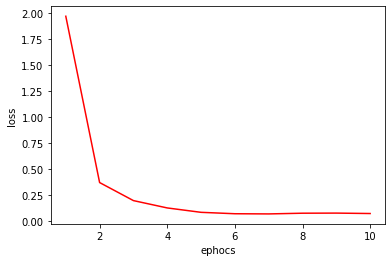

In [ ]:
loss_values = model.loss_curve_
line_x = np.arange(1, len(loss_values)+1)
plt.plot(line_x, loss_values, 'r')
plt.xlabel('ephocs')
plt.ylabel('loss')
plt.show()

In [ ]:
print('Test set score :', model.score(x_test, y_test))

Test set score : 0.9584285714285714
